In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## THIS CODE CHUNK TAKES 10 MINUTES ++ TO RUN AS THE DATASET IS LARGE, PLEASE BE PATIENT!

url = "https://drive.google.com/file/d/11_5IO1fSNncMRPaZUfuKZl0Mp1mxFB4K/view?usp=drive_link"

token = pd.read_csv('https://drive.usercontent.google.com/download?id={}&export=download&authuser=0&confirm=t'.format(url.split('/')[-2]))
token

,block_number,transaction_index,from_address,to_address,time_stamp,contract_address,value
0,14669683,7,0xd30b438df65f4f788563b2b3611bd6059bff4ad9,0xda816e2122a8a39b0926bfa84edd3d42477e9efd,1651105815,0xdac17f958d2ee523a2206206994597c13d831ec7,18.670000
1,14669683,45,0x4941834ed1428089ee76252f6f9d767e800499b0,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,0xdac17f958d2ee523a2206206994597c13d831ec7,10000.000000
2,14669683,46,0x2c1f9a20711e14f8484a41123e20d1b06858ebea,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,0xdac17f958d2ee523a2206206994597c13d831ec7,9942.313005
3,14669683,47,0x7784c4f53aa5f03bd6d3ca670c9d9c887cc38cb0,0x3cd751e6b0078be393132286c442345e5dc49699,1651105815,0xdac17f958d2ee523a2206206994597c13d831ec7,234.364097
4,14669683,48,0x66589b8278470d58d4112f3d065de0f75734312e,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,0xdac17f958d2ee523a2206206994597c13d831ec7,9800.000000
...,...,...,...,...,...,...,...
28674506,15693289,338,0x55fe002aeff02f77364de339a1292923a15844b8,0x0000000000000000000000000000000000000000,1665110327,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,853.630000
28674507,15693289,342,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x735a26a57a0a0069dfabd41595a970faf5e1ee8b,1665110327,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,3133.274260
28674508,15693289,20,0xbeefbabeea323f07c59926295205d3b7a17e8638,0x60594a405d53811d3bc4766596efd80fd545a270,1665110327,0x6b175474e89094c44da98b954eedeac495271d0f,5020.200000
28674509,15693289,186,0x53395e9e56f1b7fb3cd1fbd4c1195ef2dee71736,0x48da0965ab2d2cbf1c17c09cfb5cbe67ad5b1406,1665110327,0x6b175474e89094c44da98b954eedeac495271d0f,3921.972387


## Data Interpretation and Initial Checks

Based on some preliminary understanding of the data, each row in the dataset represents one ERC-20 token transfer event. The dataset columns are believed to have the following meaning:

- `block_number` and `transaction_index`: Used to order transactions chronologically on the blockchain.
- `from_address`: The address that sends the token.
- `to_address`: The address that receives the token.
- `time_stamp`: The time of the transaction.
- `contract_address`: The unique address on the blockchain that points to a specific smart contract.
- `value`: The size of the transfer, representing the amount of capital moved.

For our use case, the data types of the dataset columns are mostly alright. Perhaps one exception is the `time_stamp` column as conventional date or time columns are in string or datetime format. We will explore this column in greater detail later. 

In [2]:
token.dtypes

block_number           int64
transaction_index      int64
from_address          object
to_address            object
time_stamp             int64
contract_address      object
value                float64
dtype: object

Fortunately, there are no missing values in this dataset. 

In [3]:
token.isnull().sum()

block_number         0
transaction_index    0
from_address         0
to_address           0
time_stamp           0
contract_address     0
value                0
dtype: int64

The `time_stamp` column values seem to be 10-digit values. They are in Unix format, or seconds since 1 January 1970, 00:00:00 UTC. We will convert them to datetime format later to make them more human-readable. 

In [4]:
token["time_stamp"].astype(str).str.len().value_counts()

time_stamp
10    28674511
Name: count, dtype: int64

The `contract_address` column data seem to only take 1 of the following 6 values or categories: 

- **0xdac17f958d2ee523a2206206994597c13d831ec7**
- **0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48**
- **0x6b175474e89094c44da98b954eedeac495271d0f**
- **0xd2877702675e6ceb975b4a1dff9fb7baf4c91ea9**
- **0xa47c8bf37f92abed4a126bda807a7b7498661acd**
- **0x8e870d67f660d95d5be530380d0ec0bd388289e1**

On further Google searching, we find that these contract addresses correspond to the stablecoins listed in the ERC-20 zip folder. Specifically, 

- **0xdac17f958d2ee523a2206206994597c13d831ec7** is the identifier for USDT.
- **0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48** is the identifier for USDC.
- **0x6b175474e89094c44da98b954eedeac495271d0f** is the identifier for DAI.
- **0xd2877702675e6ceb975b4a1dff9fb7baf4c91ea9** is the identifier for Wrapped LUNC / LUNA / WLUNA.
- **0xa47c8bf37f92abed4a126bda807a7b7498661acd** is the identifier for USTC.
- **0x8e870d67f660d95d5be530380d0ec0bd388289e1** is the identifier for PAX / USDP.

In this case, the `contract_address` column probably identifies the stablecoins or cryptocurrency that is being transferred. We will replace the contract addresses with the stablecoin names later. 

In [5]:
token["contract_address"].value_counts()

contract_address
0xdac17f958d2ee523a2206206994597c13d831ec7    14650275
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48    11624559
0x6b175474e89094c44da98b954eedeac495271d0f     1738432
0xd2877702675e6ceb975b4a1dff9fb7baf4c91ea9      425747
0xa47c8bf37f92abed4a126bda807a7b7498661acd      179325
0x8e870d67f660d95d5be530380d0ec0bd388289e1       56173
Name: count, dtype: int64

The `value` column values are continuous. We first try to observe its distribution. However, due to some large values in the column, a log transformation is first performed on the data column before visualization to offer a more insightful view of the distribution.

From the histogram, it appears that the `value` data is rather symmetrically distributed, almost close to a normal distribution. From the boxplot, we observe there are quite a number of outliers though.

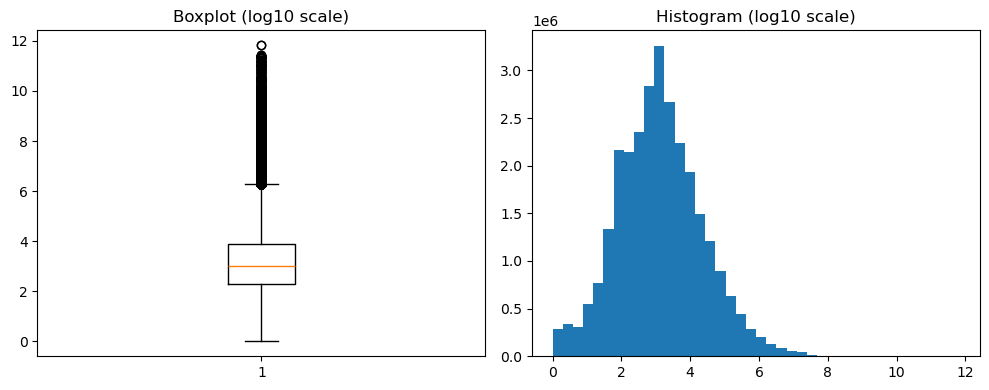

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].boxplot(np.log10(token["value"] + 1))
ax[0].set_title("Boxplot (log10 scale)")

ax[1].hist(np.log10(token["value"] + 1), bins=40)
ax[1].set_title("Histogram (log10 scale)")

plt.tight_layout()
plt.show()

Let's go one step further and display more summary statistics for this column of data:

In [7]:
summary_table = pd.DataFrame({
    "count": [token["value"].count()],
    "min": [token["value"].min()],
    "01_percentile": [token["value"].quantile(0.01)],
    "10_percentile": [token["value"].quantile(0.10)],
    "25_percentile": [token["value"].quantile(0.25)],
    "median": [token["value"].median()],
    "75_percentile": [token["value"].quantile(0.75)],
    "90_percentile": [token["value"].quantile(0.90)],
    "99_percentile": [token["value"].quantile(0.99)], 
    "max": [token["value"].max()],
    "tukey_lower_bound": token["value"].quantile(0.25) - 1.5 * (token["value"].quantile(0.75) - token["value"].quantile(0.25)),
    "tukey_upper_bound": token["value"].quantile(0.75) + 1.5 * (token["value"].quantile(0.75) - token["value"].quantile(0.25)) 
    }
)

summary_table

,count,min,01_percentile,10_percentile,25_percentile,median,75_percentile,90_percentile,99_percentile,max,tukey_lower_bound,tukey_upper_bound
0,28674511,0.0,0.951306,45.868511,196.0,1049.0,7696.109328,51171.625627,2.060236e+06,6.767923e+11,-11054.163992,18946.27332


In [8]:
tukey_upper_bound = token["value"].quantile(0.75) + 1.5 * (token["value"].quantile(0.75) - token["value"].quantile(0.25))
print(str(round((token["value"] <= tukey_upper_bound).mean() * 100, 2)) + "%")               

83.04%


It seems like there are some very large values in the `value` column. Only 83% of data values in the column fall below Tukey's upper bound (Q3 + 1.5 x IQR), and ~17% of the data values can be deemed as Tukey outliers. It appears that this column of values have a rather heavy right tail. 

But since the `value` column represents the amount of money transferred, large outlying values could genuinely (and reasonably) represent large amounts of money being transferred at that time. Hence, we will not drop any of these outliers. 

From the snapshot of the data above, it can be observed that the `to_address` column contains possibly nonsensical or erroneous addresses like **0x0000000000000000000000000000000000000000**. However, as we are unlikely to use the `from_address` and `to_address` columns for our project, we can treat this data quality issue as trivial. 

## Data Cleaning

Most of the data in this dataset is rather clean already. Only two main changes need to be made: replacing the categories in the `contract_address` column with the corresponding stablecoin names and converting the Unix timestamps in the `time_stamp` column to datetime for better interpretability. 

In [9]:
contract_address_mapping = {
    "0xdac17f958d2ee523a2206206994597c13d831ec7": "USDT",
    "0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48": "USDC", 
    "0x6b175474e89094c44da98b954eedeac495271d0f": "DAI", 
    "0xd2877702675e6ceb975b4a1dff9fb7baf4c91ea9": "WLUNA", 
    "0xa47c8bf37f92abed4a126bda807a7b7498661acd": "USTC", 
    "0x8e870d67f660d95d5be530380d0ec0bd388289e1": "PAX"
}

token["contract_address"] = token["contract_address"].replace(contract_address_mapping)
token

,block_number,transaction_index,from_address,to_address,time_stamp,contract_address,value
0,14669683,7,0xd30b438df65f4f788563b2b3611bd6059bff4ad9,0xda816e2122a8a39b0926bfa84edd3d42477e9efd,1651105815,USDT,18.670000
1,14669683,45,0x4941834ed1428089ee76252f6f9d767e800499b0,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,USDT,10000.000000
2,14669683,46,0x2c1f9a20711e14f8484a41123e20d1b06858ebea,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,USDT,9942.313005
3,14669683,47,0x7784c4f53aa5f03bd6d3ca670c9d9c887cc38cb0,0x3cd751e6b0078be393132286c442345e5dc49699,1651105815,USDT,234.364097
4,14669683,48,0x66589b8278470d58d4112f3d065de0f75734312e,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,USDT,9800.000000
...,...,...,...,...,...,...,...
28674506,15693289,338,0x55fe002aeff02f77364de339a1292923a15844b8,0x0000000000000000000000000000000000000000,1665110327,USDC,853.630000
28674507,15693289,342,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x735a26a57a0a0069dfabd41595a970faf5e1ee8b,1665110327,USDC,3133.274260
28674508,15693289,20,0xbeefbabeea323f07c59926295205d3b7a17e8638,0x60594a405d53811d3bc4766596efd80fd545a270,1665110327,DAI,5020.200000
28674509,15693289,186,0x53395e9e56f1b7fb3cd1fbd4c1195ef2dee71736,0x48da0965ab2d2cbf1c17c09cfb5cbe67ad5b1406,1665110327,DAI,3921.972387


The `contract_address` column values are now changed to the names of the stablecoins.

In [10]:
token["time_stamp"] = pd.to_datetime(token["time_stamp"], unit = "s", utc = True)
token

,block_number,transaction_index,from_address,to_address,time_stamp,contract_address,value
0,14669683,7,0xd30b438df65f4f788563b2b3611bd6059bff4ad9,0xda816e2122a8a39b0926bfa84edd3d42477e9efd,2022-04-28 00:30:15+00:00,USDT,18.670000
1,14669683,45,0x4941834ed1428089ee76252f6f9d767e800499b0,0x28c6c06298d514db089934071355e5743bf21d60,2022-04-28 00:30:15+00:00,USDT,10000.000000
2,14669683,46,0x2c1f9a20711e14f8484a41123e20d1b06858ebea,0x28c6c06298d514db089934071355e5743bf21d60,2022-04-28 00:30:15+00:00,USDT,9942.313005
3,14669683,47,0x7784c4f53aa5f03bd6d3ca670c9d9c887cc38cb0,0x3cd751e6b0078be393132286c442345e5dc49699,2022-04-28 00:30:15+00:00,USDT,234.364097
4,14669683,48,0x66589b8278470d58d4112f3d065de0f75734312e,0x28c6c06298d514db089934071355e5743bf21d60,2022-04-28 00:30:15+00:00,USDT,9800.000000
...,...,...,...,...,...,...,...
28674506,15693289,338,0x55fe002aeff02f77364de339a1292923a15844b8,0x0000000000000000000000000000000000000000,2022-10-07 02:38:47+00:00,USDC,853.630000
28674507,15693289,342,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x735a26a57a0a0069dfabd41595a970faf5e1ee8b,2022-10-07 02:38:47+00:00,USDC,3133.274260
28674508,15693289,20,0xbeefbabeea323f07c59926295205d3b7a17e8638,0x60594a405d53811d3bc4766596efd80fd545a270,2022-10-07 02:38:47+00:00,DAI,5020.200000
28674509,15693289,186,0x53395e9e56f1b7fb3cd1fbd4c1195ef2dee71736,0x48da0965ab2d2cbf1c17c09cfb5cbe67ad5b1406,2022-10-07 02:38:47+00:00,DAI,3921.972387


The `time_stamp` values are now converted to datetime type. 

## Feature Engineering and EDA

Now we try to engineer some features or indicators that can possibly act as early warning detectors of depegging. 

In [11]:
token_filtered = token[token["contract_address"].isin(["USTC", "USDC"])].copy()
token_filtered = token_filtered.sort_values(["block_number", "transaction_index"])
token_filtered["date"] = token_filtered["time_stamp"].dt.date

### Daily Transfer Volume

The daily transfer volume of a stablecoin, or the total amount of that stablecoin transacted across all addresses, could be an early-warning indicator of depegging as transfer volumes tend to be large before a stablecoin run (due to investor panic).

In [12]:
vol = token_filtered.copy()
vol = vol.groupby(["contract_address", "date"])["value"].sum().rename("daily_volume").reset_index()
vol

,contract_address,date,daily_volume
0,USDC,2022-04-28,9.415150e+09
1,USDC,2022-04-29,8.498288e+09
2,USDC,2022-04-30,7.713239e+09
3,USDC,2022-05-01,4.679284e+09
4,USDC,2022-05-02,1.094086e+10
...,...,...,...
321,USTC,2022-10-03,2.690445e+06
322,USTC,2022-10-04,4.648398e+06
323,USTC,2022-10-05,5.475857e+06
324,USTC,2022-10-06,5.804272e+06


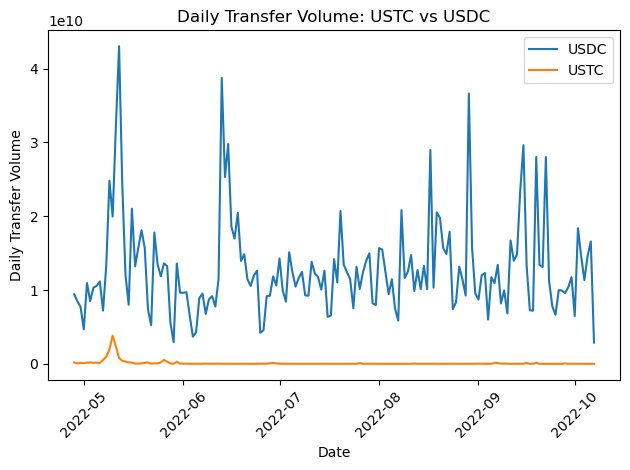

In [13]:
for contract in vol["contract_address"].unique():
    subset = vol[vol["contract_address"] == contract]
    plt.plot(subset["date"], subset["daily_volume"], label=contract)

plt.xlabel("Date")
plt.ylabel("Daily Transfer Volume")
plt.title("Daily Transfer Volume: USTC vs USDC")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The above EDA chart shows that USDC's daily transfer volume is consistently higher than USTC's, possibly due to the significantly larger number of USDC observations in the dataset (as seen during our data quality checks). The difference in USTC and USDC's daily transfer volume does not seem like a very insightful predictor for depegging. 

Instead, we consider a revised daily transfer volume feature that is normalized by the rolling mean of the past 7 days' daily transfer volume. This accounts for USDC's naturally higher transfer volume, and allows us to recognise abnormally high transfer volumes for each stablecoin (that is common during panic selling before a stablecoin crash). 

In [14]:
vol_ratio = vol.sort_values(['contract_address', 'date']).copy()

vol_ratio['rolling_7d_avg'] = (
    vol_ratio.groupby('contract_address')['daily_volume']
       .transform(lambda x: x.rolling(window=7, min_periods=1).mean())
)

vol_ratio['daily_vol_ratio_to_7d_avg'] = vol_ratio['daily_volume'] / vol_ratio['rolling_7d_avg']
vol_ratio

,contract_address,date,daily_volume,rolling_7d_avg,daily_vol_ratio_to_7d_avg
0,USDC,2022-04-28,9.415150e+09,9.415150e+09,1.000000
1,USDC,2022-04-29,8.498288e+09,8.956719e+09,0.948817
2,USDC,2022-04-30,7.713239e+09,8.542226e+09,0.902954
3,USDC,2022-05-01,4.679284e+09,7.576490e+09,0.617606
4,USDC,2022-05-02,1.094086e+10,8.249364e+09,1.326267
...,...,...,...,...,...
321,USTC,2022-10-03,2.690445e+06,1.170960e+07,0.229764
322,USTC,2022-10-04,4.648398e+06,1.196783e+07,0.388408
323,USTC,2022-10-05,5.475857e+06,4.496786e+06,1.217727
324,USTC,2022-10-06,5.804272e+06,4.203748e+06,1.380737


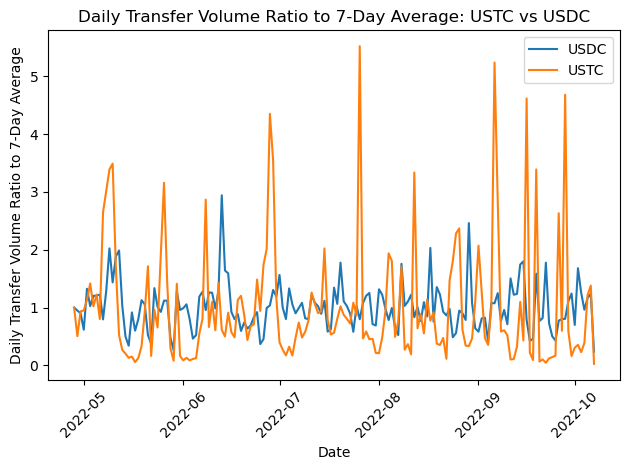

In [15]:
for contract in vol_ratio["contract_address"].unique():
    subset = vol_ratio[vol_ratio["contract_address"] == contract]
    plt.plot(subset["date"], subset["daily_vol_ratio_to_7d_avg"], label=contract)

plt.xlabel("Date")
plt.ylabel("Daily Transfer Volume Ratio to 7-Day Average")
plt.title("Daily Transfer Volume Ratio to 7-Day Average: USTC vs USDC")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now there is some observable and meaningful difference between USDC and USTC before USTC's crash in early May, as in that period, transfer volume ratio relative to the historical 7-day average is significantly high for USTC. Perhaps this will be a good indicator for detecting depegging. 

In [16]:
vol_volatility = vol.copy()

vol_volatility["log_volume"] = np.log1p(vol_volatility["daily_volume"])

vol_volatility["rolling_volatility"] = (
        vol_volatility.groupby("contract_address")["log_volume"]
        .rolling(3)
        .std()
        .reset_index(level = 0, drop = True)
    )

vol_volatility

,contract_address,date,daily_volume,log_volume,rolling_volatility
0,USDC,2022-04-28,9.415150e+09,22.965586,NaN
1,USDC,2022-04-29,8.498288e+09,22.863131,NaN
2,USDC,2022-04-30,7.713239e+09,22.766204,0.099704
3,USDC,2022-05-01,4.679284e+09,22.266411,0.320224
4,USDC,2022-05-02,1.094086e+10,23.115770,0.426888
...,...,...,...,...,...
321,USTC,2022-10-03,2.690445e+06,14.805217,0.284648
322,USTC,2022-10-04,4.648398e+06,15.352033,0.316603
323,USTC,2022-10-05,5.475857e+06,15.515860,0.372124
324,USTC,2022-10-06,5.804272e+06,15.574105,0.115143


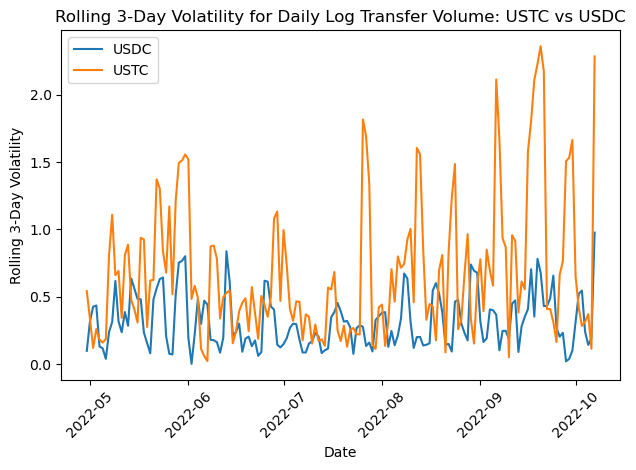

In [17]:
for contract in vol_volatility["contract_address"].unique():
    subset = vol_volatility[vol_volatility["contract_address"] == contract]
    plt.plot(subset["date"], subset["rolling_volatility"], label=contract)

plt.xlabel("Date")
plt.ylabel("Rolling 3-Day Volatility")
plt.title("Rolling 3-Day Volatility for Daily Log Transfer Volume: USTC vs USDC")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The rolling 3-day volatility for daily log transfer volume could be a relevant predictor of depegging as well. From the EDA chart above, in early May 2022 (pre-crash), USTC exhibited much more volatile transfer volumes, possibly reflecting sudden changes in transfer volumes overnight. 

In [18]:
vol_zscore = vol.copy()
grouped = vol_zscore.groupby("contract_address")["daily_volume"]
mean = grouped.transform(lambda x: x.rolling(7).mean())
std = grouped.transform(lambda x: x.rolling(7).std())
vol_zscore["volume_zscore"] = (vol_zscore["daily_volume"] - mean) / std
vol_zscore

,contract_address,date,daily_volume,volume_zscore
0,USDC,2022-04-28,9.415150e+09,NaN
1,USDC,2022-04-29,8.498288e+09,NaN
2,USDC,2022-04-30,7.713239e+09,NaN
3,USDC,2022-05-01,4.679284e+09,NaN
4,USDC,2022-05-02,1.094086e+10,NaN
...,...,...,...,...
321,USTC,2022-10-03,2.690445e+06,-0.442078
322,USTC,2022-10-04,4.648398e+06,-0.360886
323,USTC,2022-10-05,5.475857e+06,0.518146
324,USTC,2022-10-06,5.804272e+06,1.168860


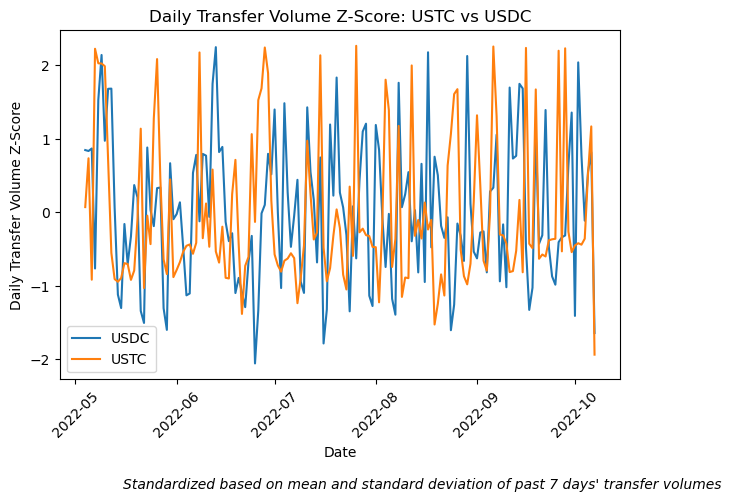

In [19]:
for contract in vol_zscore["contract_address"].unique():
    subset = vol_zscore[vol_zscore["contract_address"] == contract]
    plt.plot(subset["date"], subset["volume_zscore"], label=contract)

plt.xlabel("Date")
plt.ylabel("Daily Transfer Volume Z-Score")
plt.title("Daily Transfer Volume Z-Score: USTC vs USDC")
plt.figtext(0.2, -0.03, "Standardized based on mean and standard deviation of past 7 days' transfer volumes", style = "italic")
fig.subplots_adjust(bottom=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The daily transfer volume z-score does not show much difference in pattern between USTC and USDC. We will not use it as one of the early-warning indicators.

### Large Transfer Fraction

Before a stablecoin crash, as investors may rush to transfer large amounts of that stablecoin, there may be a significant rise in the proportion of large transfers. This feature aims to capture panic and negative sentiment in the stablecoin by counting the daily proportion of transfers that are more than $100K. 

In [20]:
transfer_frac = token_filtered.copy()
transfer_frac["is_large"] = transfer_frac["value"] > 1e5
transfer_frac = (
    transfer_frac.groupby(["contract_address", "date"])["is_large"]
    .mean()
    .rename("large_transfer_fraction")
    .reset_index()
)

transfer_frac

,contract_address,date,large_transfer_fraction
0,USDC,2022-04-28,0.100016
1,USDC,2022-04-29,0.086427
2,USDC,2022-04-30,0.083644
3,USDC,2022-05-01,0.095823
4,USDC,2022-05-02,0.094078
...,...,...,...
321,USTC,2022-10-03,0.014706
322,USTC,2022-10-04,0.015924
323,USTC,2022-10-05,0.015209
324,USTC,2022-10-06,0.037037


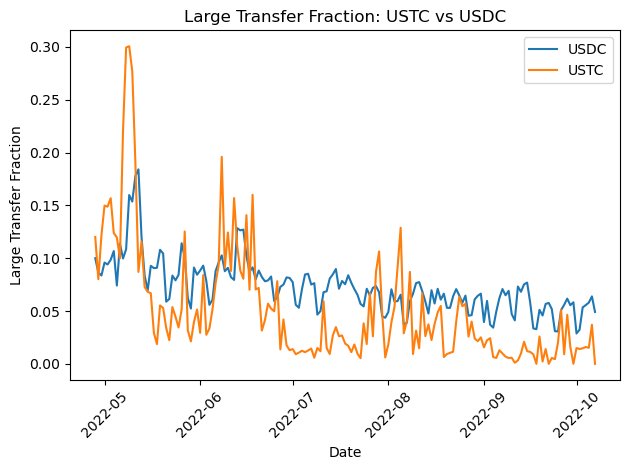

In [21]:
for contract in transfer_frac["contract_address"].unique():
    subset = transfer_frac[transfer_frac["contract_address"] == contract]
    plt.plot(subset["date"], subset["large_transfer_fraction"], label=contract)

plt.xlabel("Date")
plt.ylabel("Large Transfer Fraction")
plt.title("Large Transfer Fraction: USTC vs USDC")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The daily proportion of large transfers for USTC increased in early May, supporting economic intuition behind investor behaviour pre-crash. There is reasonable difference in USTC and USDC's behaviour in terms of this indicator too. Hence, it is a possibly useful indicator that we can consider. 

In [22]:
transfer_median = token_filtered.copy()
transfer_median = transfer_median.groupby(["contract_address", "date"])["value"].median().rename("median_transfer").reset_index()
transfer_median

,contract_address,date,median_transfer
0,USDC,2022-04-28,2953.720517
1,USDC,2022-04-29,3052.000000
2,USDC,2022-04-30,3245.276645
3,USDC,2022-05-01,3795.225200
4,USDC,2022-05-02,2600.000000
...,...,...,...
321,USTC,2022-10-03,3134.054887
322,USTC,2022-10-04,3183.290397
323,USTC,2022-10-05,3174.545321
324,USTC,2022-10-06,5956.465059


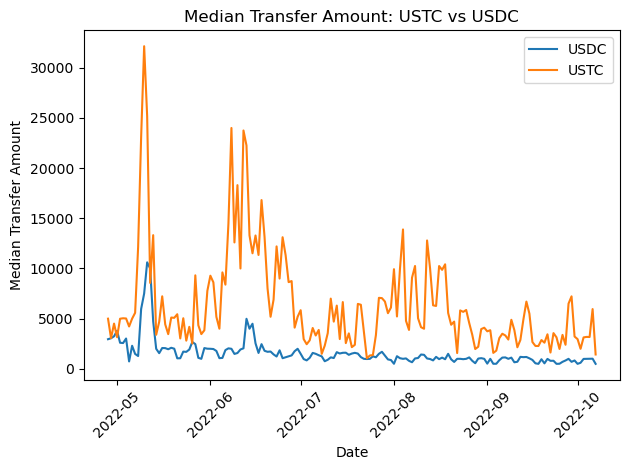

In [23]:
for contract in transfer_median["contract_address"].unique():
    subset = transfer_median[transfer_median["contract_address"] == contract]
    plt.plot(subset["date"], subset["median_transfer"], label=contract)

plt.xlabel("Date")
plt.ylabel("Median Transfer Amount")
plt.title("Median Transfer Amount: USTC vs USDC")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The EDA chart above shows that overall, in each day, USTC transfers are generally larger than that of USDC. Furthermore, the median USDC transfer amount has remained at a more stable level over time (except for some periods where it peaked), whereas in the case of USTC, there are more frequent fluctuations. This is one indicator we can consider. 

### Address Activity

In [24]:
active_addresses = token_filtered.copy()

senders = active_addresses.groupby(["contract_address", "date"]) ["from_address"].nunique()
receivers = active_addresses.groupby(["contract_address", "date"]) ["to_address"].nunique()

active_addresses = pd.concat([senders, receivers], axis=1)
active_addresses.columns = ["active_senders", "active_receivers"]

active_addresses["active_total"] = active_addresses.sum(axis=1)
active_addresses = active_addresses.reset_index()
active_addresses

,contract_address,date,active_senders,active_receivers,active_total
0,USDC,2022-04-28,18919,20523,39442
1,USDC,2022-04-29,20665,22868,43533
2,USDC,2022-04-30,18255,20105,38360
3,USDC,2022-05-01,15178,17192,32370
4,USDC,2022-05-02,19536,24291,43827
...,...,...,...,...,...
321,USTC,2022-10-03,64,64,128
322,USTC,2022-10-04,97,81,178
323,USTC,2022-10-05,75,84,159
324,USTC,2022-10-06,73,75,148


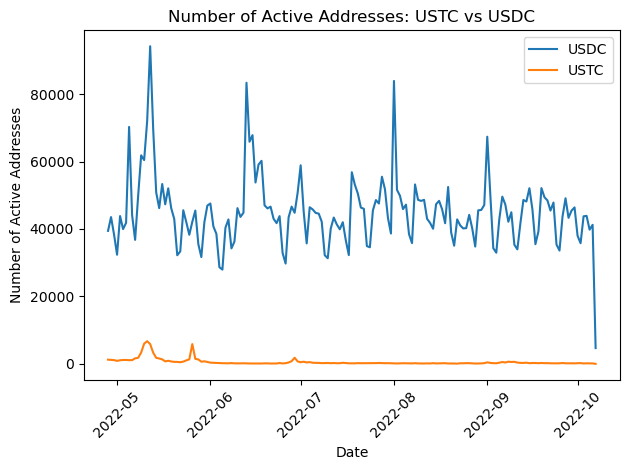

In [25]:
for contract in active_addresses["contract_address"].unique():
    subset = active_addresses[active_addresses["contract_address"] == contract]
    plt.plot(subset["date"], subset["active_total"], label=contract)

plt.xlabel("Date")
plt.ylabel("Number of Active Addresses")
plt.title("Number of Active Addresses: USTC vs USDC")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As mentioned above, as there significantly more USDC observations than USTC observations in this dataset, the number of USTC active addresses is dwarfed compared that of USDC's. To make a more insightful comparison, we can consider the new address share instead: On each day, for each stablecoin, what is the proportion of first-time addresses that are involved in the day's token transfer transactions? If this value suddenly increases, it could mean an impending stablecoin crash as existing holders may split funds across new wallets, move to fresh exchange deposit addresses and bridge to new chains — behaviour associated with panic-driven exit routing that creates many "new" interacting addresses in the process. 

In [26]:
new_address_share = token_filtered.sort_values("time_stamp").copy()

first_seen = pd.concat([
    new_address_share[["contract_address", "from_address", "time_stamp"]]
    .rename(columns={"from_address": "address"}),
    new_address_share[["contract_address", "to_address", "time_stamp"]]
    .rename(columns={"to_address": "address"})
]).sort_values("time_stamp")\
    .drop_duplicates(["contract_address", "address"], keep="first")

first_seen["date"] = first_seen["time_stamp"].dt.date

new_daily = (
    first_seen.groupby(["contract_address", "date"]) ["address"]
    .count()
    .rename("new_addresses")
)

active_daily = (
    pd.concat([
            new_address_share.groupby(["contract_address", "date"]) ["from_address"].nunique(),
            new_address_share.groupby(["contract_address", "date"]) ["to_address"].nunique()
        ], axis=1)
        .sum(axis=1)
        .rename("active_total")
)

new_address_share = (new_daily / active_daily).rename("new_address_share").reset_index()
new_address_share

,contract_address,date,new_address_share
0,USDC,2022-04-28,0.656534
1,USDC,2022-04-29,0.535410
2,USDC,2022-04-30,0.479927
3,USDC,2022-05-01,0.454649
4,USDC,2022-05-02,0.476761
...,...,...,...
321,USTC,2022-10-03,0.179688
322,USTC,2022-10-04,0.157303
323,USTC,2022-10-05,0.176101
324,USTC,2022-10-06,0.135135


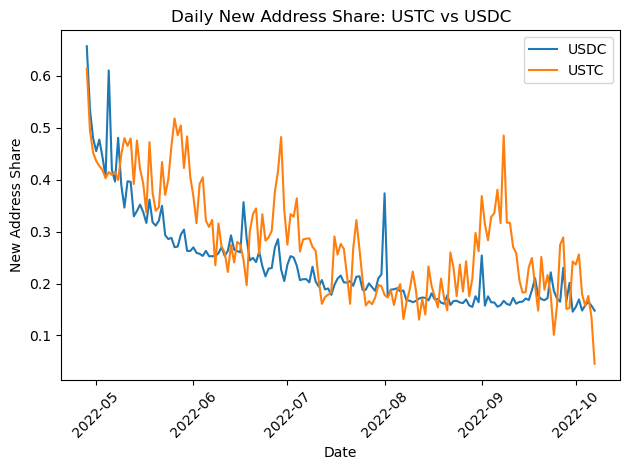

In [27]:
for contract in new_address_share["contract_address"].unique():
    subset = new_address_share[new_address_share["contract_address"] == contract]
    plt.plot(subset["date"], subset["new_address_share"], label=contract)

plt.xlabel("Date")
plt.ylabel("New Address Share")
plt.title("Daily New Address Share: USTC vs USDC")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the EDA chart above, the usefulness of this indicator is ambiguous. We shall not consider it further. 

## Transformed Dataset with Newly Engineered Features

The most useful features are the Daily Transfer Volume Ratio (to 7-Day Rolling Average), 3-Day Rolling Volatility in Daily Transfer Volume, Daily Large Transfer Fraction and Daily Median Transfer Volume. We will create our final dataset for the next step using these features.

In [28]:
features = vol_ratio[["contract_address", "date", "daily_vol_ratio_to_7d_avg"]]

for table in [vol_volatility[["contract_address", "date", "rolling_volatility"]], transfer_frac, transfer_median]: 
    features = features.merge(table, on = ["contract_address", "date"], how = "left")

features

,contract_address,date,daily_vol_ratio_to_7d_avg,rolling_volatility,large_transfer_fraction,median_transfer
0,USDC,2022-04-28,1.000000,NaN,0.100016,2953.720517
1,USDC,2022-04-29,0.948817,NaN,0.086427,3052.000000
2,USDC,2022-04-30,0.902954,0.099704,0.083644,3245.276645
3,USDC,2022-05-01,0.617606,0.320224,0.095823,3795.225200
4,USDC,2022-05-02,1.326267,0.426888,0.094078,2600.000000
...,...,...,...,...,...,...
321,USTC,2022-10-03,0.229764,0.284648,0.014706,3134.054887
322,USTC,2022-10-04,0.388408,0.316603,0.015924,3183.290397
323,USTC,2022-10-05,1.217727,0.372124,0.015209,3174.545321
324,USTC,2022-10-06,1.380737,0.115143,0.037037,5956.465059
